In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt

# to evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [0]:
# load the train and test set with the engineered variables

X_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DVF/data/xtrain.csv')
X_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DVF/data/xtest.csv')

#X_train.head()

In [0]:
# capture the target (remember that is log transformed)

y_train = X_train['Valeur fonciere']
y_test = X_test['Valeur fonciere']

In [0]:
# load the pre-selected features
# ==============================

features = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DVF/data/selected_features.csv')
features = features['0'].to_list() 

In [0]:
features = ['Date mutation',
 'Nature mutation',
 'Type de voie',
 'Code departement',
 'Section',
 'Type local',
 'Surface reelle bati',
 'Nature culture',
 'Surface terrain',
 'Code commune']

In [0]:
features=['Date mutation', 'Code departement', 'Section', 'Nature culture',
       'Surface terrain']

In [0]:
features=['Date mutation', 'Nature mutation', 'Valeur fonciere', 'No voie',
       'Type de voie', 'Voie', 'Commune', 'Code departement',
        'Section', 'Type local', 'Surface reelle bati',
       'Nombre pieces principales', 'Nature culture', 'Surface terrain']

In [0]:
# reduce the train and test set to the selected features

X_train = X_train[features]
X_test = X_test[features]

## Stochastic gradient descent regression: FAILED

In [0]:
from sklearn.linear_model import SGDRegressor

In [0]:
reg = SGDRegressor(alpha=0.008, learning_rate='optimal',max_iter=1000, tol=1e-3,random_state=0)
reg.fit(X_train,y_train)


KeyboardInterrupt: ignored

In [0]:
predtrain = reg.predict(X_train)
reg.score(X_train,y_train)



0.2525837857283574

In [0]:
predtest = reg.predict(X_test)
reg.score(X_test,y_test)

0.21097808859862455

# Regularised linear regression: Lasso LOW R2

In [0]:
# to build the model
from sklearn.linear_model import Lasso

### Model training

In [0]:
# set up the model

lin_model = Lasso(alpha=0.005, random_state=0)

# train the model

lin_model.fit(X_train, y_train)

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=False)

### Model evaluation

In [0]:
# In order to get the true performance of the Lasso
# we need to transform both the target and the predictions
# back to the original house prices values.

# We will evaluate performance using the mean squared error and
# the root of the mean squared error and r2

# make predictions for train set
pred = lin_model.predict(X_train)

# determine mse and rmse
print('train mse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred)))))
print('train rmse: {}'.format(int(
    sqrt(mean_squared_error(np.exp(y_train), np.exp(pred))))))
print('train r2: {}'.format(
    r2_score(np.exp(y_train), np.exp(pred))))
print()

# make predictions for test set
pred = lin_model.predict(X_test)

# determine mse and rmse
print('test mse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test rmse: {}'.format(int(
    sqrt(mean_squared_error(np.exp(y_test), np.exp(pred))))))
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(pred))))
print()

print('Average house price: ', int(np.exp(y_train).median()))

train mse: 3710340017875
train rmse: 1926224
train r2: -0.007156076509568177

test mse: 26190262630219
test rmse: 5117642
test r2: -0.002026413350949108

Average house price:  133999


In [0]:
# let's evaluate our predictions respect to the real sale price
plt.scatter(y_test, lin_model.predict(X_test))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Lasso Predictions')

### Distribution of the errors

In [0]:
# let's evaluate the distribution of the errors: 
# they should be fairly normally distributed

errors = y_test - lin_model.predict(X_test)
errors.hist(bins=60)

The distribution of the errors follows quite closely a gaussian distribution. That suggests that our model is doing a good job as well.

### Feature importance

In [0]:
# Finally, just for fun, let's look at the feature importance

importance = pd.Series(np.abs(lin_model.coef_.ravel()))
importance.index = features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('Lasso Coefficients')
plt.title('Feature Importance')

# RandomForestRegressor FINAL

In [0]:
# to build the model
from sklearn.ensemble import RandomForestRegressor

### Model training

In [17]:
# set up the model

model = RandomForestRegressor(n_estimators=70, max_features='auto',min_samples_leaf= 2,
 min_samples_split= 2, random_state=0)

# train the model

model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=70, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

### Model evaluation

In [18]:
# make predictions for train set
pred = model.predict(X_train)

# determine mse and rmse
print('train mse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred)))))
print('train rmse: {}'.format(int(
    sqrt(mean_squared_error(np.exp(y_train), np.exp(pred))))))
print('train r2: {}'.format(
    r2_score(np.exp(y_train), np.exp(pred))))
print()

# make predictions for test set
pred = model.predict(X_test)

# determine mse and rmse
print('test mse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test rmse: {}'.format(int(
    sqrt(mean_squared_error(np.exp(y_test), np.exp(pred))))))
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(pred))))
print()

print('Average house price: ', int(np.exp(y_train).mean()))

train mse: 313811
train rmse: 560
train r2: 0.9999999148171898

test mse: 17540832670892
test rmse: 4188177
test r2: 0.32889647207574135

Average house price:  350521


Text(0.5, 1.0, 'Evaluation of RandomForest Predictions')

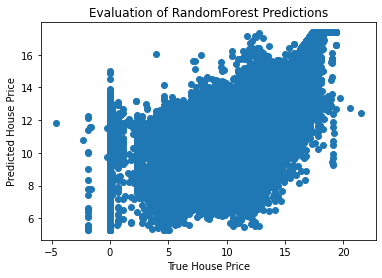

In [0]:
# let's evaluate our predictions respect to the real sale price
plt.scatter(y_test, model.predict(X_test))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of RandomForest Predictions')

### Distribution of the errors

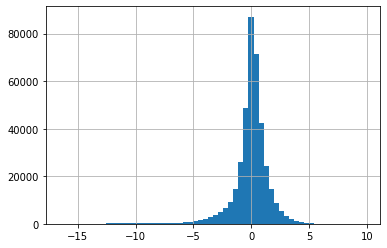

In [0]:
# let's evaluate the distribution of the errors: 
# they should be fairly normally distributed

errors = y_test - model.predict(X_test)
errors.hist(bins=60)

The distribution of the errors follows quite closely a gaussian distribution. That suggests that our model is doing a good job as well.

### Feature importance

Text(0.5, 1.0, 'Feature Importance')

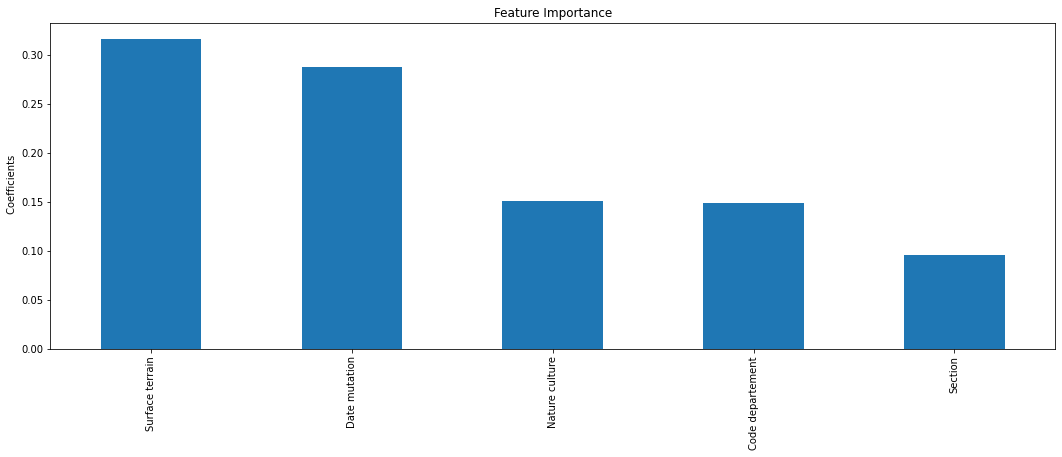

In [0]:
# Finally, just for fun, let's look at the feature importance

importance = pd.Series(np.abs(model.feature_importances_.ravel()))
importance.index = features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel(' Coefficients')
plt.title('Feature Importance')

# RandomForestRegressor with crossvalidation

In [7]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [50,70]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [30,50]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [50, 70], 'max_features': ['auto', 'sqrt'], 'max_depth': [30, 50, None], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True]}


In [9]:
# to build the model
from sklearn.ensemble import RandomForestRegressor
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state=0)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 3, verbose=2, random_state=0)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=70, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=70, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True, total= 3.2min
[CV] n_estimators=70, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.2min remaining:    0.0s


[CV]  n_estimators=70, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True, total= 3.3min
[CV] n_estimators=70, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=70, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True, total= 3.2min
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30, bootstrap=True 
[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30, bootstrap=True, total= 4.5min
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30, bootstrap=True 
[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30, bootstrap=True, total= 4.4min
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30, bootstrap=True 
[CV]  n_estimators=50, min_samples_split=2, 

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 117.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [13]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 70}

In [14]:
rf_random.best_score_

0.9999999905888584

In [15]:
rf_random.cv_results_

{'mean_fit_time': array([168.74756352, 262.13499777, 126.59383988, 117.3978467 ,
        261.05024036, 362.69140585, 266.5822285 , 138.80748494,
        379.64475338, 132.97468241]),
 'mean_score_time': array([24.65471228,  4.0046738 , 19.92439667, 16.59368555,  4.01514967,
         5.56613342,  3.9951969 , 24.74425721,  5.66020799, 20.46561376]),
 'mean_test_score': array([0.99759709, 0.99999999, 0.99839021, 0.99773967, 0.99999999,
        0.99999999, 0.99999999, 0.99872239, 0.99999999, 0.99841219]),
 'param_bootstrap': masked_array(data=[True, True, True, True, True, True, True, True, True,
                    True],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[50, 30, 50, 50, None, None, None, None, 30, 30],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fil

In [0]:
# to build the model
from sklearn.ensemble import RandomForestRegressor

### Model training

In [0]:
rf = RandomForestRegressor(n_estimators=70, max_features='sqrt', random_state=0)

random_grid = {'n_estimators': 70,
               'max_features': 'sqrt',
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               random_state=0}

rf_random = RandomizedSearchCV(estimator = rf, n_iter = 100, cv = 3, verbose=2, random_state=0,n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

In [0]:
# set up the model

model = RandomForestRegressor(n_estimators=70, max_features='sqrt', random_state=0)

# train the model

model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=70, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

### Model evaluation

In [0]:
# make predictions for train set
pred = model.predict(X_train)

# determine mse and rmse
print('train mse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred)))))
print('train rmse: {}'.format(int(
    sqrt(mean_squared_error(np.exp(y_train), np.exp(pred))))))
print('train r2: {}'.format(
    r2_score(np.exp(y_train), np.exp(pred))))
print()

# make predictions for test set
pred = model.predict(X_test)

# determine mse and rmse
print('test mse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test rmse: {}'.format(int(
    sqrt(mean_squared_error(np.exp(y_test), np.exp(pred))))))
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(pred))))
print()

print('Average house price: ', int(np.exp(y_train).mean()))

train mse: 45225931029
train rmse: 212663
train r2: 0.9877236126519646

test mse: 18780147665144
test rmse: 4333606
test r2: 0.2814808972021323

Average house price:  350521


Text(0.5, 1.0, 'Evaluation of RandomForest Predictions')

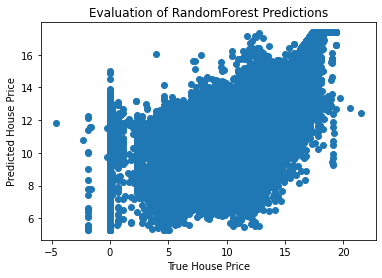

In [0]:
# let's evaluate our predictions respect to the real sale price
plt.scatter(y_test, model.predict(X_test))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of RandomForest Predictions')

### Distribution of the errors

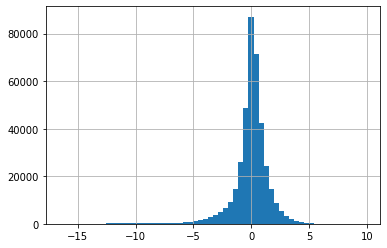

In [0]:
# let's evaluate the distribution of the errors: 
# they should be fairly normally distributed

errors = y_test - model.predict(X_test)
errors.hist(bins=60)

The distribution of the errors follows quite closely a gaussian distribution. That suggests that our model is doing a good job as well.

### Feature importance

Text(0.5, 1.0, 'Feature Importance')

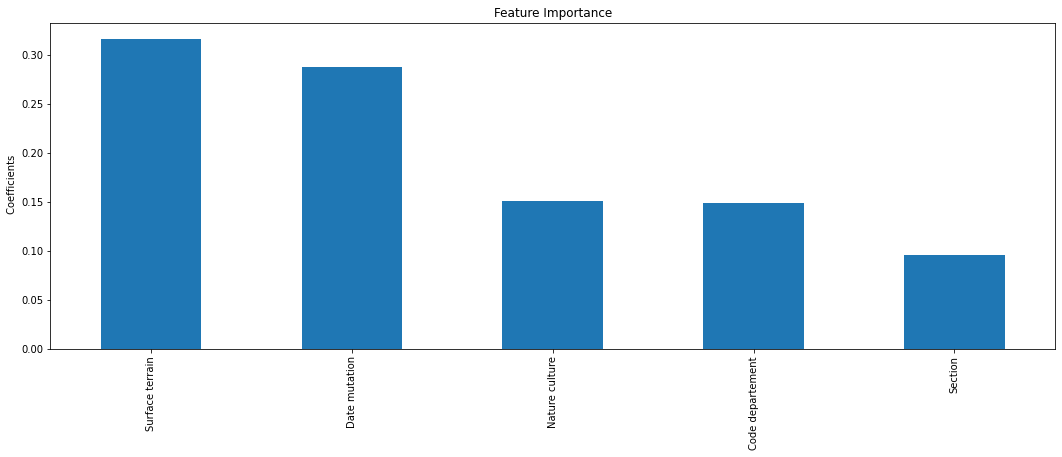

In [0]:
# Finally, just for fun, let's look at the feature importance

importance = pd.Series(np.abs(model.feature_importances_.ravel()))
importance.index = features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel(' Coefficients')
plt.title('Feature Importance')

# test different algorithms

In [0]:
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
 
Xtrn=X_train
Xtest=X_test
Ytrn=y_train 
Ytest = y_test
models = [RandomForestRegressor(n_estimators=70, max_features='sqrt')]

#models = [LinearRegression(),RandomForestRegressor(n_estimators=100, max_features='sqrt'),KNeighborsRegressor(n_neighbors=6),SVR(kernel='linear'),LogisticRegression()
 #RandomForestRegressor(n_estimators=70, max_features='sqrt') 0.34 
 #RandomForestRegressor(n_estimators=30, max_features='sqrt') 0.33             
 #LinearRegression() 0.175
TestModels = pd.DataFrame()
tmp = {}
 
for model in models:
    # get model name
    m = str(model)
    tmp['Model'] = m[:m.index('(')]
    # fit model on training dataset
    model.fit(Xtrn, Ytrn)
    # predict prices for test dataset and calculate r^2
    tmp['R2_Price'] = r2_score(Ytest, model.predict(Xtest))
    tmp['score'] = model.score(Xtest,Ytest)
    # write obtained data
    TestModels = TestModels.append([tmp])
 
TestModels.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.R2_Price.plot(ax=axes, kind='bar', title='R2_Price')
plt.show()